In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [87]:
df = pd.read_csv("E:\mushaf notes\Data Analytics\Job-Market-Intelligence-project\data\processed\job_details_cleaned.csv")

df.head()


<>:1: SyntaxWarning: "\m" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\m"? A raw string is also an option.
<>:1: SyntaxWarning: "\m" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\m"? A raw string is also an option.
C:\Users\Dell\AppData\Local\Temp\ipykernel_19996\2266273067.py:1: SyntaxWarning: "\m" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\m"? A raw string is also an option.
  df = pd.read_csv("E:\mushaf notes\Data Analytics\Job-Market-Intelligence-project\data\processed\job_details_cleaned.csv")


,job_title,company,location,experience,salary,posted_time,applicants,job_description,key_skills,job_url,...,Power BI,Tableau,Machine Learning,Statistics,AWS,Azure,core_tools_score,bi_tools_score,advanced_score,cloud_score
0,Employee Data Analyst,Salesforce,Hyderabad,5 - 6 years,Avg. salary - 17.3 LPA,2 weeks ago,100+,Employee Data Analyst This role reports to the...,"contract management, crm, customer support, da...",https://www.naukri.com/job-listings-employee-d...,...,0,0,0,0,0,0,0,0,0,0
1,Data Analyst I,Syneos Health,Hyderabad,2 - 4 years,Avg. salary - 13.5 LPA,1 day ago,100+,Our Clinical Development model brings the cust...,"analytical, automation, crm, data analysis, da...",https://www.naukri.com/job-listings-data-analy...,...,0,0,0,0,0,0,1,0,0,0
2,Data Analyst,S&P Global Market Intelligence,Hyderabad/Secunderabad,2 - 5 years,1-4 Lacs P.A.,6 days ago,100+,"S&P Global Market Intelligence Hyderabad, Ahme...","accountingsix sigma, communication skills, com...",https://www.naukri.com/job-listings-data-analy...,...,0,0,0,0,0,0,1,0,0,0
3,Data Analyst,Soul Ai,Ahmedabad,2 - 4 years,3-5 Lacs P.A.,5 days ago,100+,Hiring office located in Hyderabad Were hiring...,"business analysis, dashboard development, dash...",https://www.naukri.com/job-listings-data-analy...,...,1,0,0,0,0,0,1,1,0,0
4,Data Analyst - Data Forward Event,S&P Global Market Intelligence,Bangalore/Bengaluru,1 - 4 years,4-7 Lacs P.A.,1 day ago,100+,Data Analyst - Data Forward Event S&P Global M...,"automation, collection, communication skills, ...",https://www.naukri.com/job-listings-data-analy...,...,0,0,0,0,0,0,0,0,0,0


In [88]:
df.isna().mean().sort_values(ascending=False)

salary_lpa_min      0.185958
job_description     0.047438
experience_min      0.020873
experience          0.020873
salary              0.015180
applicants          0.013283
key_skills          0.005693
posted_time         0.005693
job_title           0.000000
company             0.000000
job_url             0.000000
location_clean      0.000000
location            0.000000
experience_level    0.000000
skill_list          0.000000
is_data_role        0.000000
SQL                 0.000000
Python              0.000000
Excel               0.000000
Power BI            0.000000
Tableau             0.000000
Machine Learning    0.000000
Statistics          0.000000
AWS                 0.000000
Azure               0.000000
core_tools_score    0.000000
bi_tools_score      0.000000
advanced_score      0.000000
cloud_score         0.000000
dtype: float64

In [89]:
df["location_clean"].value_counts()

location_clean
Hyderabad    176
Bengaluru    156
Mumbai       140
Other         41
Chennai       14
Name: count, dtype: int64

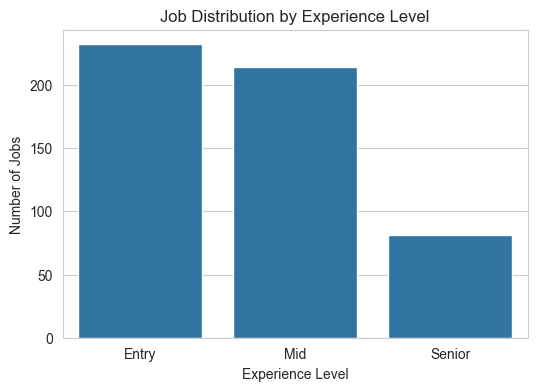

In [90]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="experience_level", order=["Entry","Mid","Senior"])
plt.title("Job Distribution by Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Number of Jobs")
plt.show()

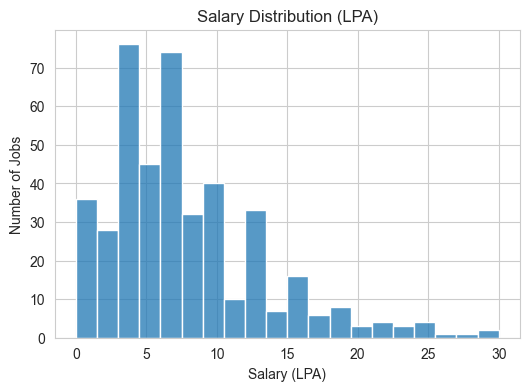

In [91]:
plt.figure(figsize=(6,4))
sns.histplot(df["salary_lpa_min"].dropna(), bins=20)
plt.title("Salary Distribution (LPA)")
plt.xlabel("Salary (LPA)")
plt.ylabel("Number of Jobs")
plt.show()

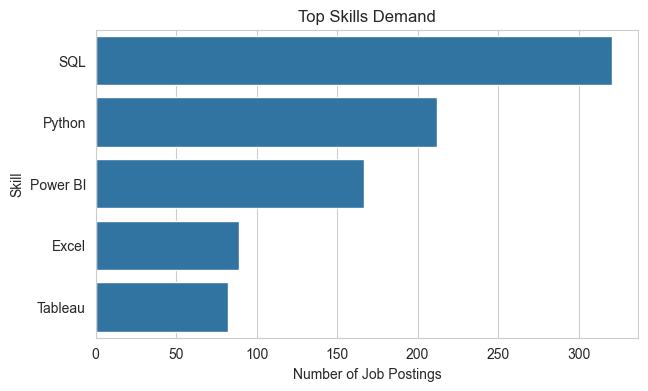

In [99]:
skill_cols = ["SQL","Python","Excel","Power BI","Tableau"]

skill_demand = df[skill_cols].sum().sort_values(ascending=False)

plt.figure(figsize=(7,4))
sns.barplot(x=skill_demand.values, y=skill_demand.index)
plt.title("Top Skills Demand")
plt.xlabel("Number of Job Postings")
plt.ylabel("Skill")
plt.show()

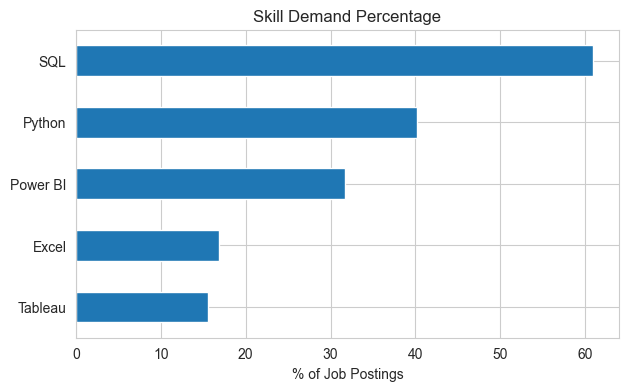

In [93]:
skill_pct = (df[skill_cols].mean() * 100).round(1)
skill_pct.sort_values().plot(kind="barh", figsize=(7,4))

plt.title("Skill Demand Percentage")
plt.xlabel("% of Job Postings")
plt.show()

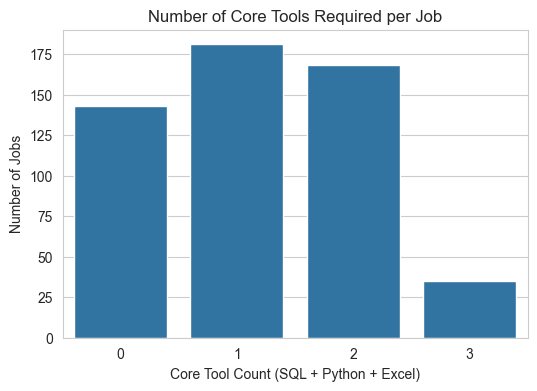

In [94]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="core_tools_score")
plt.title("Number of Core Tools Required per Job")
plt.xlabel("Core Tool Count (SQL + Python + Excel)")
plt.ylabel("Number of Jobs")
plt.show()

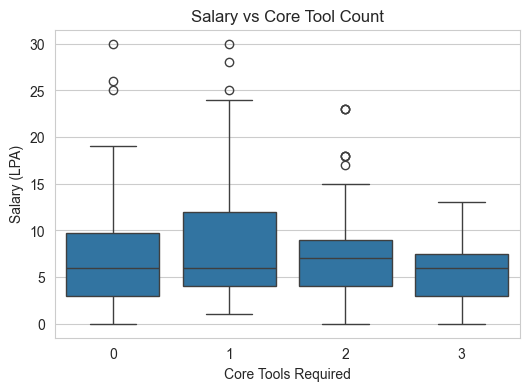

In [95]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="core_tools_score", y="salary_lpa_min")

plt.title("Salary vs Core Tool Count")
plt.xlabel("Core Tools Required")
plt.ylabel("Salary (LPA)")
plt.show()

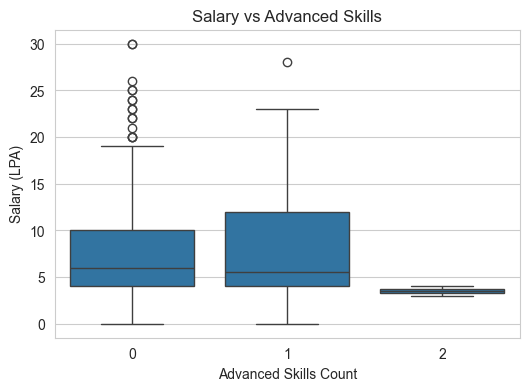

In [96]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="advanced_score", y="salary_lpa_min")

plt.title("Salary vs Advanced Skills")
plt.xlabel("Advanced Skills Count")
plt.ylabel("Salary (LPA)")
plt.show()

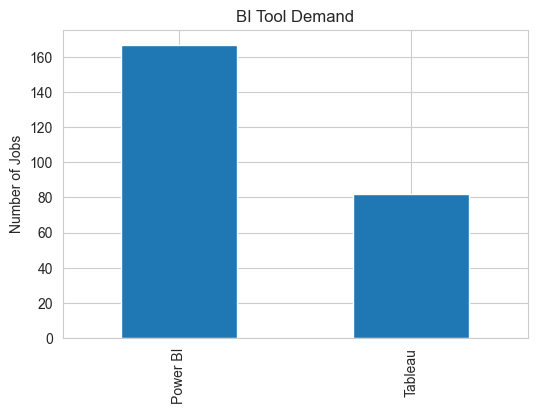

In [97]:
bi_cols = ["Power BI","Tableau"]

bi_demand = df[bi_cols].sum()

bi_demand.plot(kind="bar", figsize=(6,4))
plt.title("BI Tool Demand")
plt.ylabel("Number of Jobs")
plt.show()

Key Insights:

• SQL appears in majority of job postings  
• Python demand is strong but lower than SQL  
• Most jobs require 2–3 core tools  
• Jobs requiring more tools show higher salary  
• Advanced skills correlate with higher salary  